<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_42_MultipleIOChannels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
conv1 = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)

In [3]:
#kernels are randomly initialized
conv1.state_dict()

OrderedDict([('weight', tensor([[[[ 0.0854, -0.2625,  0.3196],
                        [-0.1633,  0.2931,  0.2618],
                        [-0.1302,  0.0692,  0.1122]]],
              
              
                      [[[-0.2505,  0.2641, -0.2499],
                        [-0.0703,  0.0897, -0.2353],
                        [ 0.1047,  0.0650, -0.1454]]],
              
              
                      [[[-0.2333,  0.3042, -0.1587],
                        [-0.0123, -0.1965, -0.0152],
                        [ 0.0145,  0.3129, -0.0544]]]])),
             ('bias', tensor([ 0.0449,  0.0748, -0.2507]))])

In [4]:
conv1.state_dict()['weight'][0][0] = torch.tensor([[1.0,0.0,-1.0],
                                      [2.0,0.0,-2.0],
                                      [1.0,0.0,-1.0]])
conv1.state_dict()['weight'][1][0] = torch.tensor([[1.0,2.0,1.0],
                                      [0.0,0.0,0.0],
                                      [-1.0,-2.0,-1.0]])
conv1.state_dict()['weight'][2][0] = torch.ones(3,3)
conv1.state_dict()['weight']

tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]],


        [[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]],


        [[[ 1.,  1.,  1.],
          [ 1.,  1.,  1.],
          [ 1.,  1.,  1.]]]])

In [5]:
conv1.state_dict()['bias'][:] = torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [6]:
image = torch.zeros(1,1,5,5)
image[0,0,:,2] = 1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

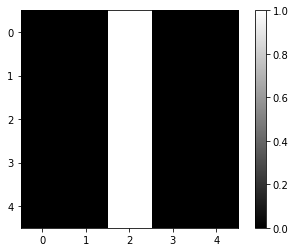

In [7]:
plt.imshow(image[0,0,:,:].numpy(),interpolation='nearest',cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [8]:
out = conv1(image)
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<SelectBackward>)


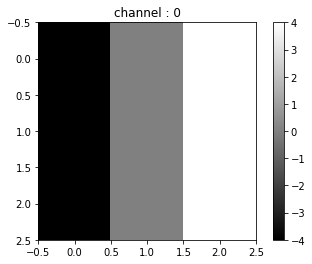

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<SelectBackward>)


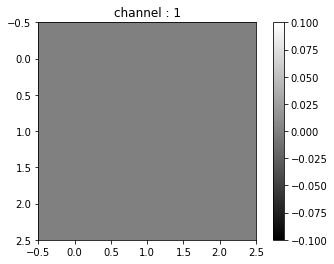

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<SelectBackward>)


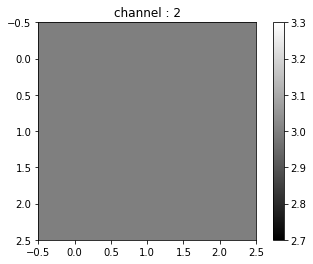

In [9]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title(f'channel : {channel}')
    plt.colorbar()
    plt.show()

In [10]:
image1 = torch.zeros(1,1,5,5)
image1[0,0,2,:] = 1
image1

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

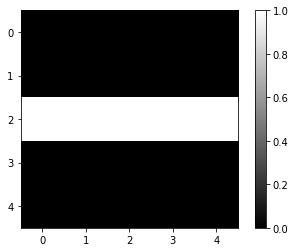

In [11]:
plt.imshow(image1[0,0,:,:].numpy(),interpolation='nearest',cmap=plt.cm.gray)
plt.colorbar()
plt.show()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<SelectBackward>)


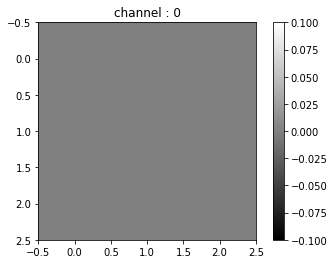

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<SelectBackward>)


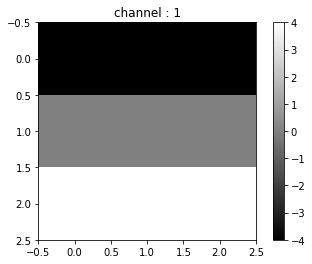

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<SelectBackward>)


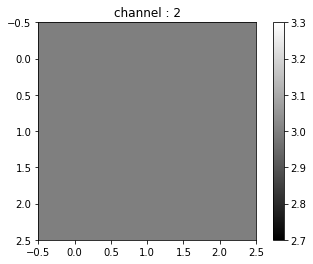

In [12]:
out1 = conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title(f'channel : {channel}')
    plt.colorbar()
    plt.show()

In [13]:
image2 = torch.zeros(1,2,5,5)
image2[0,0,2,:] = -2
image2[0,1,2,:] = 1 
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


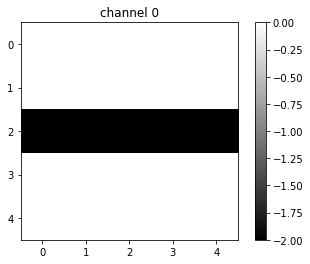

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


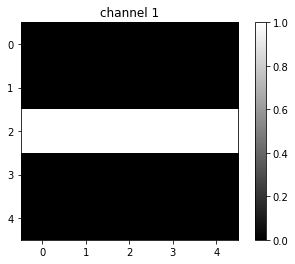

In [14]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [15]:
conv3 = nn.Conv2d(in_channels=2,out_channels=1,kernel_size=3)

In [16]:
conv3.state_dict()['weight']

tensor([[[[ 0.0761,  0.1851,  0.1121],
          [-0.1181, -0.2051, -0.0533],
          [-0.1168,  0.2248,  0.2094]],

         [[-0.1130,  0.1770, -0.0152],
          [-0.1872,  0.1334,  0.0679],
          [ 0.0073,  0.0073, -0.1927]]]])

In [17]:
conv3.state_dict()['weight'][0][0] = torch.tensor([[0.0,0.0,0.0],
                                      [0.0,1.0,0.0],
                                      [0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][1] = torch.tensor([[0.0,0.0,0.0],
                                      [0.0,-2.0,0.0],
                                      [0.0,0.0,0.0]])
conv3.state_dict()['bias'][:] = torch.tensor([0.0])

In [18]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[ 0.,  0.,  0.],
          [ 0., -2.,  0.],
          [ 0.,  0.,  0.]]]])

In [19]:
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<MkldnnConvolutionBackward>)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


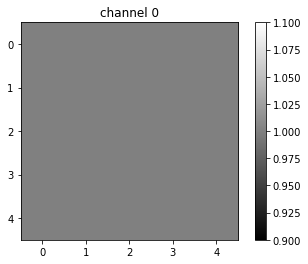

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


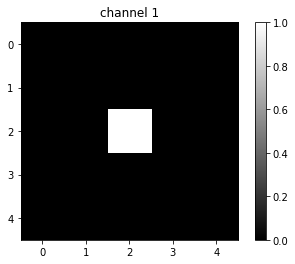

In [20]:
#multiple input and output channels
image4 = torch.zeros(1,2,5,5)
image4[0][0] = torch.ones(5,5)
image4[0][1][2][2] = 1
for channel,image in enumerate(image4[0]):
  plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
  print(image)
  plt.title("channel {}".format(channel))
  plt.colorbar()
  plt.show()

In [24]:
conv4 = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0] = torch.tensor([[0.0,0.0,0.0],
                                                  [0.0,0.5,0.0],
                                                  [0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1] = torch.tensor([[0.0,0.0,0.0],
                                                  [0.0,0.5,0.0],
                                                  [0.0,0.0,0.0]])

conv4.state_dict()['weight'][1][0] = torch.tensor([[0.0,0.0,0.0],
                                                  [0.0,1.0,0.0],
                                                  [0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1] = torch.tensor([[0.0,0.0,0.0],
                                                  [0.0,-1.0,0.0],
                                                  [0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0] = torch.tensor([[1.0,0.0,-1.0],
                                                  [2.0,0.0,-2.0],
                                                  [1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1] = torch.tensor([[1.0,2.0,1.0],
                                                  [0.0,0.0,0.0],
                                                  [-1.0,-2.0,-1.0]])

conv4.state_dict()['bias'][:] = torch.tensor([0.0,0.0,0.0]) 

In [26]:
z = conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<MkldnnConvolutionBackward>)